# Imports

In [94]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Allow maximum view of Dataframe.

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

Import Dataset

In [3]:
df = pd.read_csv("analytic_data2019.csv", low_memory=False)

# Exploring Data

In [4]:
df.shape

(3195, 534)

In [5]:
df.head(2)

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,Premature death CI high,Premature death (Black),Premature death (Hispanic),Premature death (White),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor or fair health CI low,Poor or fair health CI high,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor physical health days CI low,Poor physical health days CI high,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Poor mental health days CI low,Poor mental health days CI high,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight CI low,Low birthweight CI high,Low birthweight (Black),Low birthweight (Hispanic),Low birthweight (White),Adult smoking raw value,Adult smoking numerator,Adult smoking denominator,Adult smoking CI low,Adult smoking CI high,Adult obesity raw value,Adult obesity numerator,Adult obesity denominator,Adult obesity CI low,Adult obesity CI high,Food environment index raw value,Food environment index numerator,Food environment index denominator,Food environment index CI low,Food environment index CI high,Physical inactivity raw value,Physical inactivity numerator,Physical inactivity denominator,Physical inactivity CI low,Physical inactivity CI high,Access to exercise opportunities raw value,Access to exercise opportunities numerator,Access to exercise opportunities denominator,Access to exercise opportunities CI low,Access to exercise opportunities CI high,Excessive drinking raw value,Excessive drinking numerator,Excessive drinking denominator,Excessive drinking CI low,Excessive drinking CI high,Alcohol-impaired driving deaths raw value,Alcohol-impaired driving deaths numerator,Alcohol-impaired driving deaths denominator,Alcohol-impaired driving deaths CI low,Alcohol-impaired driving deaths CI high,Sexually transmitted infections raw value,Sexually transmitted infections numerator,Sexually transmitted infections denominator,Sexually transmitted infections CI low,Sexually transmitted infections CI high,Teen births raw value,Teen births numerator,Teen births denominator,Teen births CI low,Teen births CI high,Teen births (Black),Teen births (Hispanic),Teen births (White),Uninsured raw value,Uninsured numerator,Uninsured denominator,Uninsured CI low,Uninsured CI high,Primary care physicians raw value,Primary care physicians numerator,Primary care physicians denominator,Primary care physicians CI low,Primary care physicians CI high,Ratio of population to primary care physicians.,Dentists raw value,Dentists numerator,Dentists denominator,Dentists CI low,Dentists CI high,Ratio of population to dentists.,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Mental health providers CI low,Mental health providers CI high,Ratio of population to mental health providers.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays CI low,Preventable hospital stays CI high,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Mammography screening raw value,Mammography screening numerator,Mammography screening denominator,Mammography screening CI low,Mammography screening CI high,Mammography screening (Black),Mammography screening (Hispanic),Mammography screening (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations CI low,Flu vaccinations CI high,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,High 

We saw that there were many columns based on statistics of other columns and decided to remove them. 

In [6]:
cicols = []
for column in df.columns:
    if ("CI" in column) or ("(Black)" in column) or ("(White)" in column) or ("(Hispanic)" in column) or ("numerator" in column) or ("denominator" in column):
        cicols.append(column)

In [7]:
df_clean1 = df.drop(cicols, axis=1)

In [8]:
df_clean1.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Low birthweight raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Sexually transmitted infections raw value,Teen births raw value,Uninsured raw value,Primary care physicians raw value,Ratio of population to primary care physicians.,Dentists raw value,Ratio of population to dentists.,Mental health providers raw value,Ratio of population to mental health providers.,Preventable hospital stays raw value,Mammography screening raw value,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Social associations raw value,Violent crime raw value,Injury deaths raw value,Air pollution - particulate matter raw value,Drinking water violations raw value,Severe housing problems raw value,Percentage of households with high housing costs,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Child mortality raw value,Infant mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,HIV prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Drug overdose deaths raw value,Motor vehicle crash deaths raw value,Insufficient sleep raw value,Uninsured adults raw value,Uninsured children raw value,Other primary care providers raw value,Ratio of population to primary care providers other than physicians.,Disconnected youth raw value,Median household income raw value,Children eligible for free or reduced price lunch raw value,Residential segregation - Black/White raw value,Residential segregation - non-white/white raw value,Homicides raw value,Firearm fatalities raw value,Homeownership raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Non-Hispanic African American raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic white raw value,% not proficient in English raw value,% Females raw value,% Rural raw value,Communicable disease raw value,Self-inflicted injury hospitalizations raw value,Cancer incidence raw value,Coronary heart disease hospitalizations raw value,Cerebrovascular disease hospitalizations raw value,Smoking during pregnancy raw value,Drug arrests raw value,Opioid hospital visits raw value,Alcohol-related hospitalizations raw value,Motor vehicle crash occupancy rate raw value,On-road motor vehicle crash-related ER visits raw value,Off-road motor vehicle crash-related ER visits raw value,Childhood immunizations raw value,Reading proficiency raw value,W-2 enrollment raw value,Poverty raw value,Older adults living alone raw value,Hate crimes raw value,Child abuse raw value,Injury hospitalizations raw value,Fall fatalities 65+ raw value,Year structure built raw value,Male population 0-17 raw value,Male population 18-44 raw value,Male population 45-64 raw value,Male population 65+ raw value,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value
0,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v002_rawvalue

By removing the statistic based columns we reduced the variables from 534 to 119.

In [9]:
df_clean1.shape

(3195, 119)

Next we checked the number of null values in the remaining columns that were greater than 100 and then removed them.

In [10]:
df_clean1.isnull().sum()[df_clean1.isnull().sum() > 100].sort_values(ascending=False)

Hate crimes raw value                                          3181
Alcohol-related hospitalizations raw value                     3131
Fall fatalities 65+ raw value                                  3129
Self-inflicted injury hospitalizations raw value               3124
Coronary heart disease hospitalizations raw value              3123
Cerebrovascular disease hospitalizations raw value             3123
Drug arrests raw value                                         3122
Off-road motor vehicle crash-related ER visits raw value       3122
Opioid hospital visits raw value                               3122
W-2 enrollment raw value                                       3121
Total female population raw value                              3121
Motor vehicle crash occupancy rate raw value                   3121
Smoking during pregnancy raw value                             3121
On-road motor vehicle crash-related ER visits raw value        3121
Cancer incidence raw value                      

In [11]:
null_cols = []
for column in df_clean1.columns:
    if column in df_clean1.columns[df_clean1.isnull().sum() > 100]:
        null_cols.append(column)

In [12]:
df_clean1 = df_clean1.drop(null_cols, axis=1)

Removing columns with a 100 or more nulls we reduced the variables from 119 to 66.

In [13]:
df_clean1.shape

(3195, 66)

In [14]:
df_clean1.head(2)

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Uninsured raw value,Dentists raw value,Ratio of population to dentists.,Preventable hospital stays raw value,Mammography screening raw value,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Social associations raw value,Air pollution - particulate matter raw value,Drinking water violations raw value,Severe housing problems raw value,Percentage of households with high housing costs,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Uninsured adults raw value,Uninsured children raw value,Other primary care providers raw value,Ratio of population to primary care providers other than physicians.,Median household income raw value,Homeownership raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Non-Hispanic African American raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic white raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
0,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v002_rawvalue,v036_rawvalue,v042_rawvalue,v009_rawvalue,v011_rawvalue,v133_rawvalue,v070_rawvalue,v132_rawvalue,v049_rawvalue,v134_rawvalue,v085_rawvalue,v088_rawvalue,v088_other_data_1,v005_rawvalue,v050_rawvalue,v155_rawvalue,v021_rawvalue,v069_rawvalue,v023_rawvalue,v024_rawvalue,v044_rawvalue,v082_rawvalue,v140_rawvalue,v125_rawvalue,v124_rawvalue,v136_rawvalue,v136_other_data_1,v136_other_data_2,v136_other_data_3,v067_rawvalue,v137_rawvalue,v147_rawvalue,v127_rawvalue,v144_rawvalue,v145_rawvalue,v060_rawvalue,v139_rawvalue,v083_rawvalue,v143_rawvalue,v003_rawvalue,v122_rawvalue,v131_rawvalue,v131_other_data_1,v063_rawvalue,v153_rawvalue,v154_rawvalue,v051_rawvalue,v052_rawvalue,v053_rawvalue,v054_rawvalue,v055_rawvalue,v081_rawvalue,v080_rawvalue,v056_rawvalue,v126_rawvalue,v059_rawvalue,v057_rawvalue,v058_rawvalue
1,00,000,00000,US,United States,2019,NaN,6900.630354,NaN,NaN,NaN,NaN,0.285,7.7,0.222,0.8389448174,NaN,0.2857150971,0.1000885875,0.0006843073,1461.3318468,NaN,NaN,NaN,0.846,0.6522563975,0.0435556876,0.184,4.9414857531,0.3325168477,9.3003532014,NaN,NaN,0.1837308951,NaN,NaN,NaN,0.7644223139,0.352,79.063850411,339.5,NaN,NaN,0.102,0.129,0.0590124246,NaN,0.1208028915,0.0467021934,0.0008823736,1133.3068134,60336,0.6381868061,0.1512417878,325719178,0.2261315359,0.1561427218,0.1248080179,0.0126007164,0.0582988669,0.0024114976,0.1809740813,0.6072810456,0.0445539242,0.5075263299,NaN


We dropped the first row in the dataset as it contained a subset of columns names.

In [15]:
df_clean1.drop(df_clean1.index[0],inplace=True)

We saw that there were extra rows for the entire US and a mean for each State. To keep each row relatable to each other we abandoned those rows.

In [16]:
df_clean1.head(3)

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Uninsured raw value,Dentists raw value,Ratio of population to dentists.,Preventable hospital stays raw value,Mammography screening raw value,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Social associations raw value,Air pollution - particulate matter raw value,Drinking water violations raw value,Severe housing problems raw value,Percentage of households with high housing costs,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Uninsured adults raw value,Uninsured children raw value,Other primary care providers raw value,Ratio of population to primary care providers other than physicians.,Median household income raw value,Homeownership raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Non-Hispanic African American raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic white raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
1,00,000,00000,US,United States,2019,NaN,6900.630354,NaN,NaN,NaN,NaN,0.285,7.7,0.222,0.8389448174,NaN,0.2857150971,0.1000885875,0.0006843073,1461.3318468,NaN,NaN,NaN,0.846,0.6522563975,0.0435556876,0.184,4.9414857531,0.3325168477,9.3003532014,NaN,NaN,0.1837308951,NaN,NaN,NaN,0.7644223139,0.352,79.063850411,339.5,NaN,NaN,0.102,0.129,0.0590124246,NaN,0.1208028915,0.0467021934,0.0008823736,1133.3068134,60336,0.6381868061,0.1512417878,325719178,0.2261315359,0.1561427218,0.1248080179,0.0126007164,0.0582988669,0.0024114976,0.1809740813,0.6072810456,0.0445539242,0.5075263299,NaN
2,01,000,01000,AL,Alabama,2019,NaN,9917.2328984,0.2140240566,4.4004575204,4.577366748,0.215381544,0.351,5.8,0.282,0.6164961831,0.1417814586,0.2859025033,0.107717996,0.0004761273,2100.2787592,5496,0.42,0.42,0.893,0.5986474992,0.0439678517,0.244,5.238579235,0.3810461622,12.242715851,11,0.0746268657,0.1491215019,NaN,NaN,NaN,0.8586852864,0.337,75.41303499,472.4,0.1401604896,0.1454883116,0.139,0.165,0.0792142495,0.3772095459,0.1384998828,0.0266538976,0.0007559367,1322.8621438,48193,0.6857437544,0.1291760781,4874747,0.2247240729,0.1648846597,0.2652090457,0.0069968759,0.0146341954,0.0010747224,0.0432961957,0.6557985471,0.0107484565,0.5159059537,0.409631829
3,01,001,01001,AL,Autauga County,2019,1,8824.0571232,0.1841112436,4.2005779826,4.3067392835,0.191246585,0.375,7.2,0.311,0.686775027,0.1687801512,0.2881355932,0.085009665,0.000324301,3083.5555556,6599,0.44,0.41,0.9,0.6085466499,0.0386352233,0.193,4.6366638778,0.2470009686,12.631730908,11.7,0,0.1495464575,0.1320522296,0.0245158127,0.0063741113,0.8596505653,0.383,76.330589011,438.7,0.1282443447,0.1263835707,0.142,0.134,0.11991125,0.3590540606,0.1096110384,0.0247619048,0.0003062842,3264.9411765,58343,0.732877363,0.1264520575,55504,0.2393701355,0.1511963102,0.1925446815,0.004756414,0.0127918709,0.0010449697,0.0285745172,0.7447391179,0.0082854831,0.513422456,0.4200216232


In [17]:
df_clean1.drop(df_clean1[df_clean1["County Ranked (Yes=1/No=0)"].isnull()].index,inplace=True)

In [18]:
df_clean1.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Uninsured raw value,Dentists raw value,Ratio of population to dentists.,Preventable hospital stays raw value,Mammography screening raw value,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Social associations raw value,Air pollution - particulate matter raw value,Drinking water violations raw value,Severe housing problems raw value,Percentage of households with high housing costs,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Uninsured adults raw value,Uninsured children raw value,Other primary care providers raw value,Ratio of population to primary care providers other than physicians.,Median household income raw value,Homeownership raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Non-Hispanic African American raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic white raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
3,01,001,01001,AL,Autauga County,2019,1,8824.0571232,0.1841112436,4.2005779826,4.3067392835,0.191246585,0.375,7.2,0.311,0.686775027,0.1687801512,0.2881355932,0.085009665,0.000324301,3083.5555556,6599,0.44,0.41,0.9,0.6085466499,0.0386352233,0.193,4.6366638778,0.2470009686,12.631730908,11.7,0,0.1495464575,0.1320522296,0.0245158127,0.0063741113,0.8596505653,0.383,76.330589011,438.7,0.1282443447,0.1263835707,0.142,0.134,0.11991125,0.3590540606,0.1096110384,0.0247619048,0.0003062842,3264.9411765,58343,0.732877363,0.1264520575,55504,0.2393701355,0.1511963102,0.1925446815,0.004756414,0.0127918709,0.0010449697,0.0285745172,0.7447391179,0.0082854831,0.513422456,0.4200216232
4,01,003,01003,AL,Baldwin County,2019,1,7224.6321603,0.1806045782,4.0987477691,4.2496487805,0.1679548515,0.31,8,0.238,0.7197103119,0.1671496869,0.31875,0.1069928804,0.0004985232,2005.9245283,3833,0.45,0.45,0.863615768,0.6613392634,0.0398833641,0.147,4.5185596041,0.2518409096,10.692212904,10.3,1,0.1383172525,0.1256927814,0.0107280211,0.0060724647,0.8471942348,0.405,78.599497656,348.4,0.1262200157,0.1282255819,0.113,0.123,0.054244266,0.3330586814,0.1357031075,0.0323802671,0.0005220385,1915.5675676,56607,0.7285933826,0.1279592201,212628,0.2184848656,0.1994704366,0.0895319525,0.0077600316,0.0115647986,0.0006866452,0.0455020035,0.8304738793,0.0045451229,0.5145277198,0.4227909911
5,01,005,01005,AL,Barbour County,2019,1,9586.165037,0.2577341563,5.0674383044,4.634994147,0.2154087757,0.443,5.6,0.282,0.5362566923,0.1269871542,0.2962962963,0.1251319664,0.0003561535,2807.7777778,4736,0.46,0.37,0.8141025641,0.3677400805,0.0590092278,0.503,5.7550626063,0.5721574344,8.4729443482,11.5,0,0.1545553145,0.1367426348,0.0200650759,0.0081344902,0.8340435333,0.338,75.77945737,469.8,0.1621615961,0.1463231059,0.18,0.232,0.1073966657,0.3856316713,0.1654223969,0.0290142368,0.0002374357,4211.6666667,32490,0.6250680013,0.1358676522,25270,0.2076375

Now we have 3142 rows which is total number of counties in USA.

In [19]:
df_clean1.shape

(3142, 66)

With under 70 columns, we looked at the description for each column to see if the variable had any implication for a change in premature death rate hence an implication for charging higher insurance premiums.

In [20]:
df_clean1.columns

Index(['State FIPS Code', 'County FIPS Code', '5-digit FIPS Code',
       'State Abbreviation', 'Name', 'Release Year',
       'County Ranked (Yes=1/No=0)', 'Premature death raw value',
       'Poor or fair health raw value', 'Poor physical health days raw value',
       'Poor mental health days raw value', 'Adult smoking raw value',
       'Adult obesity raw value', 'Food environment index raw value',
       'Physical inactivity raw value',
       'Access to exercise opportunities raw value',
       'Excessive drinking raw value',
       'Alcohol-impaired driving deaths raw value', 'Uninsured raw value',
       'Dentists raw value', 'Ratio of population to dentists.',
       'Preventable hospital stays raw value',
       'Mammography screening raw value', 'Flu vaccinations raw value',
       'High school graduation raw value', 'Some college raw value',
       'Unemployment raw value', 'Children in poverty raw value',
       'Income inequality raw value',
       'Children in single-par

We came to a conclusion that the columns in the columns_to_delete list were not suitable for our model, and we dropped them.

In [21]:
columns_to_delete = ["Release Year","County Ranked (Yes=1/No=0)","Access to exercise opportunities raw value","Uninsured raw value",
                     "Dentists raw value","Preventable hospital stays raw value","Mammography screening raw value",
                     "Social associations raw value","Drinking water violations raw value","Percentage of households with high housing costs",
                     "Uninsured children raw value","Uninsured adults raw value","Homeownership raw value",
                     '% Non-Hispanic African American raw value','% American Indian and Alaskan Native raw value', '% Asian raw value',
                     '% Native Hawaiian/Other Pacific Islander raw value','% Hispanic raw value', '% Non-Hispanic white raw value',
                     '% not proficient in English raw value', '% Females raw value']

In [22]:
df_clean2 = df_clean1.drop(columns_to_delete, axis=1)

In [23]:
df_clean2.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Ratio of population to dentists.,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Air pollution - particulate matter raw value,Severe housing problems raw value,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Other primary care providers raw value,Ratio of population to primary care providers other than physicians.,Median household income raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Rural raw value
3,01,001,01001,AL,Autauga County,8824.0571232,0.1841112436,4.2005779826,4.3067392835,0.191246585,0.375,7.2,0.311,0.1687801512,0.2881355932,3083.5555556,0.41,0.9,0.6085466499,0.0386352233,0.193,4.6366638778,0.2470009686,11.7,0.1495464575,0.0245158127,0.0063741113,0.8596505653,0.383,76.330589011,438.7,0.1282443447,0.1263835707,0.142,0.134,0.11991125,0.3590540606,0.0003062842,3264.9411765,58343,0.1264520575,55504,0.2393701355,0.1511963102,0.4200216232
4,01,003,01003,AL,Baldwin County,7224.6321603,0.1806045782,4.0987477691,4.2496487805,0.1679548515,0.31,8,0.238,0.1671496869,0.31875,2005.9245283,0.45,0.863615768,0.6613392634,0.0398833641,0.147,4.5185596041,0.2518409096,10.3,0.1383172525,0.0107280211,0.0060724647,0.8471942348,0.405,78.599497656,348.4,0.1262200157,0.1282255819,0.113,0.123,0.054244266,0.3330586814,0.0005220385,1915.5675676,56607,0.1279592201,212628,0.2184848656,0.1994704366,0.4227909911
5,01,005,01005,AL,Barbour County,9586.165037,0.2577341563,5.0674383044,4.634994147,0.2154087757,0.443,5.6,0.282,0.1269871542,0.2962962963,2807.7777778,0.37,0.8141025641,0.3677400805,0.0590092278,0.503,5.7550626063,0.5721574344,11.5,0.1545553145,0.0200650759,0.0081344902,0.8340435333,0.338,75.77945737,469.8,0.1621615961,0.1463231059,0.18,0.232,0.1073966657,0.3856316713,0.0002374357,4211.6666667,32490,0.1358676522,25270,0.2076375148,0.1882469331,0.677896347
6,01,007,01007,AL,Bibb County,11783.543675,0.1999691186,4.3633772783,4.3157100192,0.1991640424,0.378,7.6,0.349,0.1592515079,0.2727272727,3778,0.39,0.8376383764,0.4840631037,0.043851399,0.273,4.2545944386,0.2956540355,11.2,0.1096085409,0.0019928826,0.0028469751,0.8636590229,0.486,73.928271076,563.7,0.1316296828,0.1285403606,0.149,0.158,0.0260162701,0.381488654,0.0009264161,1079.4285714,45795,0.0873388931,22668,0.2060614082,0.1602258691,0.6835260746
7,01,009,01009,AL,Blount County,10908.101822,0.2109532316,4.5127526482,4.7015992588,0.1965215818,0.344,8.5,0.285,0.1537872189,0.21875,4834.4166667,0.38,0.9346879536,0.5441399754,0.0402139299,0.185,4.1268834637,0.2956973294,11.7,0.1040115301,0.0172471775,0.0091280327,0.8679227508,0.597,74.597766875,501.8,0.1372005681,0.138279427,0.143,0.11,0.0288014982,0.3594501042,0.0001896127,5273.9090909,48253,0.0819449522,58013,0.2334993881,0.1784255253,0.8995150204


We now have 45 variables in total to work with.

In [24]:
df_clean2.shape

(3142, 45)

In [25]:
df_clean2.reset_index(inplace=True)

In [26]:
df_clean2 = df_clean2.drop("index", axis=1)

In [27]:
df_clean2.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Ratio of population to dentists.,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Air pollution - particulate matter raw value,Severe housing problems raw value,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Other primary care providers raw value,Ratio of population to primary care providers other than physicians.,Median household income raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Rural raw value
0,01,001,01001,AL,Autauga County,8824.0571232,0.1841112436,4.2005779826,4.3067392835,0.191246585,0.375,7.2,0.311,0.1687801512,0.2881355932,3083.5555556,0.41,0.9,0.6085466499,0.0386352233,0.193,4.6366638778,0.2470009686,11.7,0.1495464575,0.0245158127,0.0063741113,0.8596505653,0.383,76.330589011,438.7,0.1282443447,0.1263835707,0.142,0.134,0.11991125,0.3590540606,0.0003062842,3264.9411765,58343,0.1264520575,55504,0.2393701355,0.1511963102,0.4200216232
1,01,003,01003,AL,Baldwin County,7224.6321603,0.1806045782,4.0987477691,4.2496487805,0.1679548515,0.31,8,0.238,0.1671496869,0.31875,2005.9245283,0.45,0.863615768,0.6613392634,0.0398833641,0.147,4.5185596041,0.2518409096,10.3,0.1383172525,0.0107280211,0.0060724647,0.8471942348,0.405,78.599497656,348.4,0.1262200157,0.1282255819,0.113,0.123,0.054244266,0.3330586814,0.0005220385,1915.5675676,56607,0.1279592201,212628,0.2184848656,0.1994704366,0.4227909911
2,01,005,01005,AL,Barbour County,9586.165037,0.2577341563,5.0674383044,4.634994147,0.2154087757,0.443,5.6,0.282,0.1269871542,0.2962962963,2807.7777778,0.37,0.8141025641,0.3677400805,0.0590092278,0.503,5.7550626063,0.5721574344,11.5,0.1545553145,0.0200650759,0.0081344902,0.8340435333,0.338,75.77945737,469.8,0.1621615961,0.1463231059,0.18,0.232,0.1073966657,0.3856316713,0.0002374357,4211.6666667,32490,0.1358676522,25270,0.2076375148,0.1882469331,0.677896347
3,01,007,01007,AL,Bibb County,11783.543675,0.1999691186,4.3633772783,4.3157100192,0.1991640424,0.378,7.6,0.349,0.1592515079,0.2727272727,3778,0.39,0.8376383764,0.4840631037,0.043851399,0.273,4.2545944386,0.2956540355,11.2,0.1096085409,0.0019928826,0.0028469751,0.8636590229,0.486,73.928271076,563.7,0.1316296828,0.1285403606,0.149,0.158,0.0260162701,0.381488654,0.0009264161,1079.4285714,45795,0.0873388931,22668,0.2060614082,0.1602258691,0.6835260746
4,01,009,01009,AL,Blount County,10908.101822,0.2109532316,4.5127526482,4.7015992588,0.1965215818,0.344,8.5,0.285,0.1537872189,0.21875,4834.4166667,0.38,0.9346879536,0.5441399754,0.0402139299,0.185,4.1268834637,0.2956973294,11.7,0.1040115301,0.0172471775,0.0091280327,0.8679227508,0.597,74.597766875,501.8,0.1372005681,0.138279427,0.143,0.11,0.0288014982,0.3594501042,0.0001896127,5273.9090909,48253,0.0819449522,58013,0.2334993881,0.1784255253,0.8995150204


Next we looked at the number of null values in each column and to decide on how to approach them.

In [28]:
df_clean2.isnull().sum()

State FIPS Code                                                          0
County FIPS Code                                                         0
5-digit FIPS Code                                                        0
State Abbreviation                                                       0
Name                                                                     0
Premature death raw value                                               61
Poor or fair health raw value                                            0
Poor physical health days raw value                                      0
Poor mental health days raw value                                        0
Adult smoking raw value                                                  0
Adult obesity raw value                                                  0
Food environment index raw value                                        19
Physical inactivity raw value                                            0
Excessive drinking raw va

Due to premature death values being out dependant variable in our model we abandoned all counties with null values for that column.

In [29]:
df_null_counties = df_clean2[df_clean2["Premature death raw value"].isnull()]

In [30]:
df_null_counties.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Ratio of population to dentists.,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Air pollution - particulate matter raw value,Severe housing problems raw value,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Other primary care providers raw value,Ratio of population to primary care providers other than physicians.,Median household income raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Rural raw value
67,02,013,02013,AK,Aleutians East Borough,NaN,0.1674102301,3.4184644667,2.7264742276,0.1742706196,0.395,5.2,0.222,0.1686403499,NaN,3370,NaN,0.8235294118,0.4197916667,0.0251547988,0.115,4.3479992485,0.4145785877,NaN,0.1449275362,0.0405797101,0.0275362319,0.2638190955,0.005,92.482239572,NaN,0.1024379456,0.0900943235,0.086,0.129,0.3493750965,0.3590732098,0.0017804154,561.66666667,69375,0.1101321586,3370,0.0872403561,0.0902077151,1
72,02,068,02068,AK,Denali Borough,NaN,0.1220058402,3.2327847277,2.9594226823,0.1761442168,0.27,6.2,0.152,0.2271516403,0.4,-2074,NaN,0.4509803922,0.7391304348,0.0938053097,0.09,3.2834168599,0.1086261981,NaN,0.2647058824,0.0867647059,0.1544117647,0.3504551365,0.204,81.204038233,NaN,0.0960478113,0.098866628,0.068,0.137,0.2293371496,0.2999909218,0.0014464802,691.33333333,73220,0.0617283951,2074,0.1890067502,0.100289296,1
90,02,230,02230,AK,Skagway Municipality,NaN,0.1072976694,2.9608035893,2.8813490977,0.1621250406,0.299,8.1,0.152,0.2432163312,NaN,-1157,0.15,1,0.7887323944,0.1055825243,0.086,2.556075485,0.3507462687,NaN,0.1975308642,0.0543209877,0.0469135802,0.4198813056,0.011,NaN,NaN,0.087939495,0.0938950978,0.066,0.143,0.0005050889,0.2837188813,0.0034572169,289.25,66991,0.0407124682,1157,0.1443388073,0.1477960242,NaN
94,02,282,02282,AK,Yakutat Borough,NaN,0.1809969356,4.168482261,3.7772690709,0.2224992157,0.313,5.9,0.224,0.1946487283,NaN,-605,NaN,0.8571428571,0.5677083333,0.0936170213,0.307,3.256,0.3489932886,NaN,0.18,0.064,0.056,0.487394958,0,NaN,NaN,0.1285190565,0.1256558223,0.091,0.138,0.2535433057,0.3335269154,0,-605,59955,0.0822510823,605,0.1917355372,0.1834710744,1
253,08,017,08017,CO,Cheyenne County,NaN,0.1228980425,3.1174861414,3.4460484085,0.1352830637,0.228,8,0.225,0.1881908754,0.4,-1845,0.33,0.8888888889,0.598,0.0174672489,0.214,3.9079891901,0.1435185185,5.8,0.0738255034,0.0053691275,0.010738255,0.7313915858,0.113,78.040394065,NaN,0.0957781001,0.1027779328,0.069,0.102,0.0987929279,0.2627396588,0.0005420054,1845,50571,0.0814606742,1845,0.2536585366,0.2043360434,1


In [31]:
df_clean2.drop(df_clean2[df_clean2["Premature death raw value"].isnull()].index,inplace=True)

In [32]:
df_clean2.isnull().sum()

State FIPS Code                                                          0
County FIPS Code                                                         0
5-digit FIPS Code                                                        0
State Abbreviation                                                       0
Name                                                                     0
Premature death raw value                                                0
Poor or fair health raw value                                            0
Poor physical health days raw value                                      0
Poor mental health days raw value                                        0
Adult smoking raw value                                                  0
Adult obesity raw value                                                  0
Food environment index raw value                                        19
Physical inactivity raw value                                            0
Excessive drinking raw va

In [33]:
df_clean2.shape

(3081, 45)

In [34]:
df_clean2 = df_clean2.drop("Ratio of population to dentists.", axis=1)

In [35]:
df_clean2 = df_clean2.drop(["Other primary care providers raw value","Ratio of population to primary care providers other than physicians."], axis=1)

In [36]:
df_clean2[df_clean2["Alcohol-impaired driving deaths raw value"].isnull()]

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Air pollution - particulate matter raw value,Severe housing problems raw value,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Median household income raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Rural raw value
76,02,105,02105,AK,Hoonah-Angoon Census Area,7824.9275219,0.1728048772,4.10577138,3.7768453624,0.2159685412,0.317,4.3,0.216,0.183931276,NaN,NaN,0.7272727273,0.4556074766,0.1263157895,0.322,3.8466482678,0.5243553009,NaN,0.1966292135,0.0202247191,0.1011235955,0.3809045226,0.037,80.22684914,340.6,0.1255115991,0.1274667575,0.104,0.161,0.3876796357,0.3084262071,50573,0.0607661823,2145,0.1883449883,0.2223776224,NaN
82,02,164,02164,AK,Lake and Peninsula Borough,16719.375613,0.2397352374,5.2483058619,4.5745490221,0.3208132308,0.335,3.4,0.236,0.2005509302,NaN,NaN,NaN,0.4811594203,0.1189488243,0.223,4.1672519549,0.5164835165,NaN,0.2653061224,0.0897959184,0.1530612245,0.2204301075,0,NaN,641.8,0.1673217521,0.16051985,0.079,0.186,0.4351634435,0.3438953129,47644,0.0578512397,1620,0.2802469136,0.1049382716,1
87,02,195,02195,AK,Petersburg Census Area,9433.0888164,0.1315746697,3.3757655322,3.1096900909,0.1734408676,0.3,8.4,0.176,0.2091347435,NaN,NaN,0.9090909091,0.5889046942,0.093418259,0.097,4.4598940252,0.3139695712,NaN,0.1673151751,0.0217898833,0.0272373541,0.4523352527,0.007,77.43607651,365.5,0.1006847467,0.1034729041,0.078,0.127,0.006621123,0.280942693,59176,0.11010682,3281,0.214568729,0.1843950015,NaN
89,02,220,02220,AK,Sitka Borough,5987.6318447,0.1362025284,3.4163549868,3.1474872615,0.1770002666,0.289,8.2,0.176,0.2212069796,NaN,0.18,0.8201058201,0.661167002,0.0467520791,0.1,3.4941546894,0.4106765328,NaN,0.1700288184,0.0331412104,0.0244956772,0.6092743667,0.013,80.826120981,293.4,0.0994957495,0.101995759,0.078,0.12,0.0413290624,0.3007379916,69501,0.1392749245,8689,0.2175164,0.1496144551,0.2087602747
93,02,275,02275,AK,Wrangell City,6286.7242293,0.1562533313,3.7944392034,3.5055986272,0.1865306025,0.362,7.7,0.209,0.1915829544,NaN,NaN,0.875,0.679916318,0.0771428571,0.188,4.3686309989,0.4458333333,NaN,0.16,0.0195555556,0.0577777778,0.5862745098,0.015,80.576585365,302.4,0.1150811836,0.1159700858,0.094,0.133,0.0656658199,0.2919640123,55696,0.0717054264,2521,0.1963506545,0.2237207457,NaN
504,13,239,13239,GA,Quitman County,14796.821779,0.2334477681,4.5605966397,4.2179819983,0.2014119858,0.321,5.1,0.291,0.1093877338,NaN,0.28,0.8,0.3721461187,0.0592503023,0.43,4.7334438458,0.4691689008,10.9,0.1674876847,0.0039408867,0,0.7301808067,0.269,76.24807073,518.1,0.1438378383,0.1396889879,0.188,0.212,0.2014647351,0.3832046152,31151,0.1885913853,2358,0.1904156064,0.3015267176,0.7309988062
1093,21,201,21201,KY,Robertson County,12422.698144,0.2178533021,4.8560741636,4.5646585783,0.2126549669,0.343,4.7,0.282,0.1310690752,NaN,0.46,1,0.5129411765,0.062052506,0.292,5.5749749441,0.3439635535,10.1,0.0967741935,0.0161290323,0.0043010753,0.8535178777,0.502,72.87138,610.7,0.147966816,0.1416267545,0

In [37]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3081 entries, 0 to 3141
Data columns (total 42 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   State FIPS Code                                                       3081 non-null   object
 1   County FIPS Code                                                      3081 non-null   object
 2   5-digit FIPS Code                                                     3081 non-null   object
 3   State Abbreviation                                                    3081 non-null   object
 4   Name                                                                  3081 non-null   object
 5   Premature death raw value                                             3081 non-null   object
 6   Poor or fair health raw value                                         3081 non-null   object
 7   Poor p

In [38]:
df_first_5 = df_clean2.iloc[:,0:5]

In [39]:
df_first_5.head(3)

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name
0,01,001,01001,AL,Autauga County
1,01,003,01003,AL,Baldwin County
2,01,005,01005,AL,Barbour County


In [40]:
df_second_half = df_clean2.iloc[:,5:40]

In [41]:
df_second_half.head(3)

,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Air pollution - particulate matter raw value,Severe housing problems raw value,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Median household income raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value
0,8824.0571232,0.1841112436,4.2005779826,4.3067392835,0.191246585,0.375,7.2,0.311,0.1687801512,0.2881355932,0.41,0.9,0.6085466499,0.0386352233,0.193,4.6366638778,0.2470009686,11.7,0.1495464575,0.0245158127,0.0063741113,0.8596505653,0.383,76.330589011,438.7,0.1282443447,0.1263835707,0.142,0.134,0.11991125,0.3590540606,58343,0.1264520575,55504,0.2393701355
1,7224.6321603,0.1806045782,4.0987477691,4.2496487805,0.1679548515,0.31,8,0.238,0.1671496869,0.31875,0.45,0.863615768,0.6613392634,0.0398833641,0.147,4.5185596041,0.2518409096,10.3,0.1383172525,0.0107280211,0.0060724647,0.8471942348,0.405,78.599497656,348.4,0.1262200157,0.1282255819,0.113,0.123,0.054244266,0.3330586814,56607,0.1279592201,212628,0.2184848656
2,9586.165037,0.2577341563,5.0674383044,4.634994147,0.2154087757,0.443,5.6,0.282,0.1269871542,0.2962962963,0.37,0.8141025641,0.3677400805,0.0590092278,0.503,5.7550626063,0.5721574344,11.5,0.1545553145,0.0200650759,0.0081344902,0.8340435333,0.338,75.77945737,469.8,0.1621615961,0.1463231059,0.18,0.232,0.1073966657,0.3856316713,32490,0.1358676522,25270,0.2076375148


In [42]:
df_second_half = df_second_half.astype(float)

In [43]:
df_second_half.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3081 entries, 0 to 3141
Data columns (total 35 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Premature death raw value                                             3081 non-null   float64
 1   Poor or fair health raw value                                         3081 non-null   float64
 2   Poor physical health days raw value                                   3081 non-null   float64
 3   Poor mental health days raw value                                     3081 non-null   float64
 4   Adult smoking raw value                                               3081 non-null   float64
 5   Adult obesity raw value                                               3081 non-null   float64
 6   Food environment index raw value                                      3062 non-null   float64
 7

In [44]:
df_clean3 = df_first_5.merge(df_second_half,left_index=True,right_index=True)
df_clean3.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Air pollution - particulate matter raw value,Severe housing problems raw value,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Median household income raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value
0,01,001,01001,AL,Autauga County,8824.057123,0.184111,4.200578,4.306739,0.191247,0.375,7.2,0.311,0.168780,0.288136,0.41,0.900000,0.608547,0.038635,0.193,4.636664,0.247001,11.7,0.149546,0.024516,0.006374,0.859651,0.383,76.330589,438.7,0.128244,0.126384,0.142,0.134,0.119911,0.359054,58343.0,0.126452,55504.0,0.239370
1,01,003,01003,AL,Baldwin County,7224.632160,0.180605,4.098748,4.249649,0.167955,0.310,8.0,0.238,0.167150,0.318750,0.45,0.863616,0.661339,0.039883,0.147,4.518560,0.251841,10.3,0.138317,0.010728,0.006072,0.847194,0.405,78.599498,348.4,0.126220,0.128226,0.113,0.123,0.054244,0.333059,56607.0,0.127959,212628.0,0.218485
2,01,005,01005,AL,Barbour County,9586.165037,0.257734,5.067438,4.634994,0.215409,0.443,5.6,0.282,0.126987,0.296296,0.37,0.814103,0.367740,0.059009,0.503,5.755063,0.572157,11.5,0.154555,0.020065,0.008134,0.834044,0.338,75.779457,469.8,0.162162,0.146323,0.180,0.232,0.107397,0.385632,32490.0,0.135868,25270.0,0.207638
3,01,007,01007,AL,Bibb County,11783.543675,0.199969,4.363377,4.315710,0.199164,0.378,7.6,0.349,0.159252,0.272727,0.39,0.837638,0.484063,0.043851,0.273,4.254594,0.295654,11.2,0.109609,0.001993,0.002847,0.863659,0.486,73.928271,563.7,0.131630,0.128540,0.149,0.158,0.026016,0.381489,45795.0,0.087339,22668.0,0.206061
4,01,009,01009,AL,Blount County,10908.101822,0.210953,4.512753,4.701599,0.196522,0.344,8.5,0.285,0.153787,0.218750,0.38,0.934688,0.544140,0.040214,0.185,4.126883,0.295697,11.7,0.104012,0.017247,0.009128,0.867923,0.597,74.597767,501.8,0.137201,0.138279,0.143,0.110,0.028801,0.359450,48253.0,0.081945,58013.0,0.233499


In [59]:
# corr = df_clean3.corr()
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# plt.figure(figsize=(60,60))
# sns.heatmap(corr,annot=True, mask=mask,cmap="YlGnBu")
# plt.autoscale()
# plt.show()

In [46]:
df_clean3.isnull().sum()

State FIPS Code                                                          0
County FIPS Code                                                         0
5-digit FIPS Code                                                        0
State Abbreviation                                                       0
Name                                                                     0
Premature death raw value                                                0
Poor or fair health raw value                                            0
Poor physical health days raw value                                      0
Poor mental health days raw value                                        0
Adult smoking raw value                                                  0
Adult obesity raw value                                                  0
Food environment index raw value                                        19
Physical inactivity raw value                                            0
Excessive drinking raw va

In [47]:
df_clean4 = df_clean3.drop(["Life expectancy raw value","Premature age-adjusted mortality raw value","Alcohol-impaired driving deaths raw value"] , axis=1)

In [48]:
df_clean4.isnull().sum()

State FIPS Code                                                          0
County FIPS Code                                                         0
5-digit FIPS Code                                                        0
State Abbreviation                                                       0
Name                                                                     0
Premature death raw value                                                0
Poor or fair health raw value                                            0
Poor physical health days raw value                                      0
Poor mental health days raw value                                        0
Adult smoking raw value                                                  0
Adult obesity raw value                                                  0
Food environment index raw value                                        19
Physical inactivity raw value                                            0
Excessive drinking raw va

In [49]:
df4 = df_clean4.dropna().groupby('State Abbreviation')[['Food environment index raw value','Flu vaccinations raw value',"Air pollution - particulate matter raw value", "High school graduation raw value",'Limited access to healthy foods raw value']].median()
df4.reset_index(inplace=True)

In [52]:
df_clean5 = df_clean4.merge(df4, how = 'right', on = 'State Abbreviation')
df_clean5['Food environment index raw value_x'].fillna(df_clean5['Food environment index raw value_y'], inplace = True)
df_clean5['Flu vaccinations raw value_x'].fillna(df_clean5['Flu vaccinations raw value_y'], inplace = True)
df_clean5['High school graduation raw value_x'].fillna(df_clean5['High school graduation raw value_y'], inplace = True)
df_clean5['Limited access to healthy foods raw value_x'].fillna(df_clean5['Limited access to healthy foods raw value_y'], inplace = True)

df_clean5.drop(df_clean5.columns[37:42], axis=1, inplace=True)

In [53]:
df_clean5.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value_x,Physical inactivity raw value,Excessive drinking raw value,Flu vaccinations raw value_x,High school graduation raw value_x,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Air pollution - particulate matter raw value_x,Severe housing problems raw value,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value_x,Insufficient sleep raw value,Median household income raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value
0,01,001,01001,AL,Autauga County,8824.057123,0.184111,4.200578,4.306739,0.191247,0.375,7.2,0.311,0.168780,0.41,0.900000,0.608547,0.038635,0.193,4.636664,0.247001,11.7,0.149546,0.024516,0.006374,0.859651,0.383,0.128244,0.126384,0.142,0.134,0.119911,0.359054,58343.0,0.126452,55504.0,0.239370
1,01,003,01003,AL,Baldwin County,7224.632160,0.180605,4.098748,4.249649,0.167955,0.310,8.0,0.238,0.167150,0.45,0.863616,0.661339,0.039883,0.147,4.518560,0.251841,10.3,0.138317,0.010728,0.006072,0.847194,0.405,0.126220,0.128226,0.113,0.123,0.054244,0.333059,56607.0,0.127959,212628.0,0.218485
2,01,005,01005,AL,Barbour County,9586.165037,0.257734,5.067438,4.634994,0.215409,0.443,5.6,0.282,0.126987,0.37,0.814103,0.367740,0.059009,0.503,5.755063,0.572157,11.5,0.154555,0.020065,0.008134,0.834044,0.338,0.162162,0.146323,0.180,0.232,0.107397,0.385632,32490.0,0.135868,25270.0,0.207638
3,01,007,01007,AL,Bibb County,11783.543675,0.199969,4.363377,4.315710,0.199164,0.378,7.6,0.349,0.159252,0.39,0.837638,0.484063,0.043851,0.273,4.254594,0.295654,11.2,0.109609,0.001993,0.002847,0.863659,0.486,0.131630,0.128540,0.149,0.158,0.026016,0.381489,45795.0,0.087339,22668.0,0.206061
4,01,009,01009,AL,Blount County,10908.101822,0.210953,4.512753,4.701599,0.196522,0.344,8.5,0.285,0.153787,0.38,0.934688,0.544140,0.040214,0.185,4.126883,0.295697,11.7,0.104012,0.017247,0.009128,0.867923,0.597,0.137201,0.138279,0.143,0.110,0.028801,0.359450,48253.0,0.081945,58013.0,0.233499


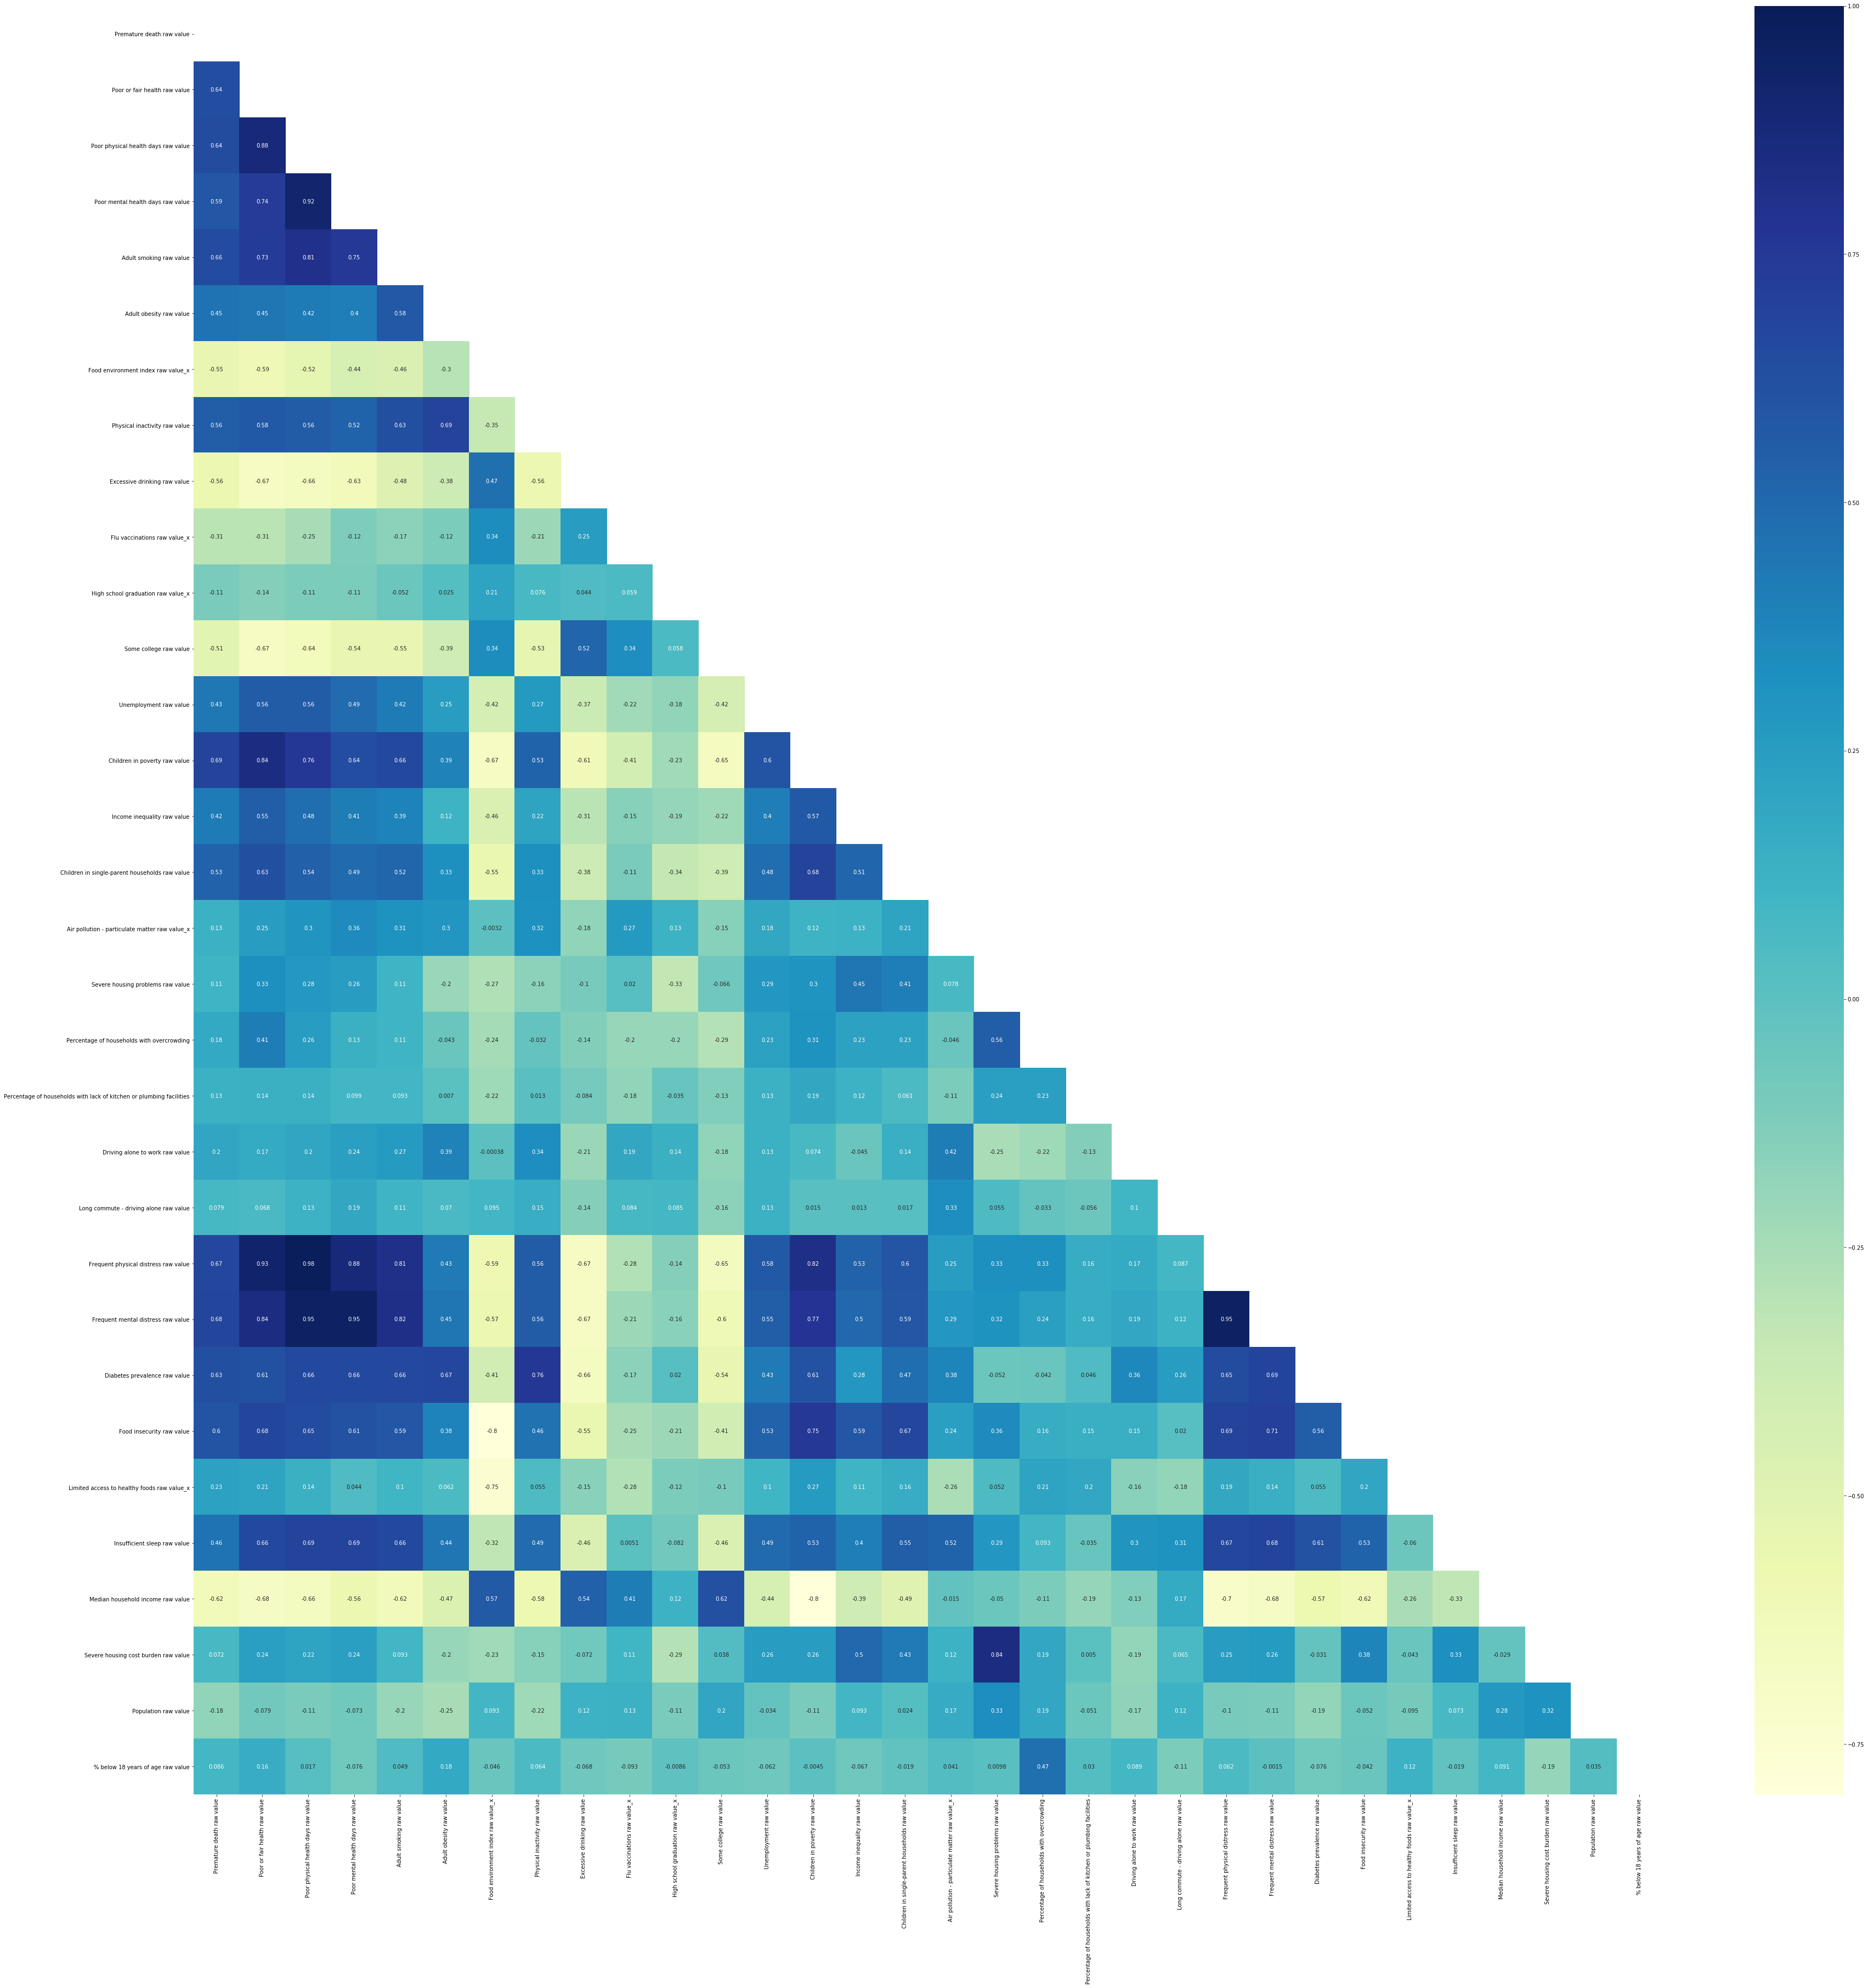

In [54]:
corr = df_clean5.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(60,60))
sns.heatmap(corr,annot=True, mask=mask,cmap="YlGnBu")
plt.autoscale()
plt.show()

# Modeling

In [264]:
y = df_clean5['Premature death raw value']
X = df_clean5.iloc[:,6:37]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.75)

/Users/ahilan/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [265]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [266]:
X_train_s = pd.DataFrame(X_train_s, columns = X_train.columns)

In [267]:
X_train_s.columns

Index(['Poor or fair health raw value', 'Poor physical health days raw value',
       'Poor mental health days raw value', 'Adult smoking raw value',
       'Adult obesity raw value', 'Food environment index raw value_x',
       'Physical inactivity raw value', 'Excessive drinking raw value',
       'Flu vaccinations raw value_x', 'High school graduation raw value_x',
       'Some college raw value', 'Unemployment raw value',
       'Children in poverty raw value', 'Income inequality raw value',
       'Children in single-parent households raw value',
       'Air pollution - particulate matter raw value_x',
       'Severe housing problems raw value',
       'Percentage of households with overcrowding',
       'Percentage of households with lack of kitchen or plumbing facilities',
       'Driving alone to work raw value',
       'Long commute - driving alone raw value',
       'Frequent physical distress raw value',
       'Frequent mental distress raw value', 'Diabetes prevalence raw v

We have created a variable called chosen_variable to input different variables in different regression models to find the best fit.

In [268]:
chosen_variable = "Adult obesity raw value"

## Linear

R^2 score = 0.20


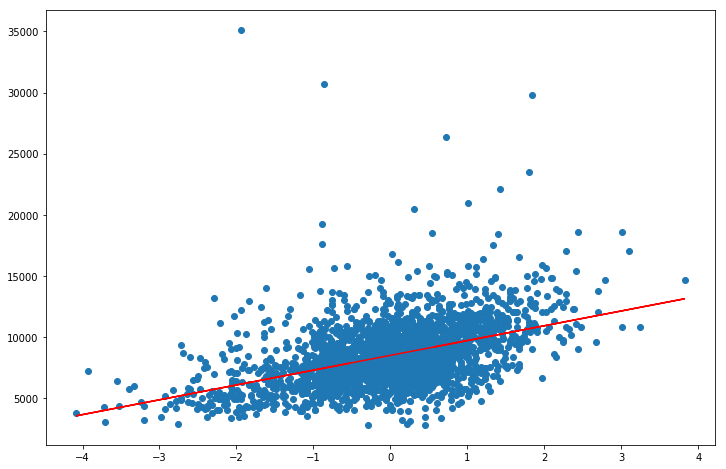

In [269]:
lr = LinearRegression()
lr.fit(X_train_s[chosen_variable].values.reshape(-1,1),y_train)
model_pred = lr.predict(X_train_s[chosen_variable].values.reshape(-1,1))
plt.figure(figsize=(12,8))
plt.scatter(X_train_s[chosen_variable],y_train)
plt.plot(X_train_s[chosen_variable],model_pred,color="red")
print("R^2 score = {:.2f}".format(r2_score(y_train,model_pred)))

In [270]:
poly_reg = PolynomialFeatures(degree=2)
X_poly_b = poly_reg.fit_transform(X_train_s[chosen_variable].values.reshape(-1,1))
lin_reg_2 = LinearRegression()

In [271]:
lin_reg_2.fit(X_poly_b,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [272]:
X_fit = np.arange(X_train_s[chosen_variable].values.min(),X_train_s[chosen_variable].values.max(),1)[:,np.newaxis]

In [273]:
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X_fit.reshape(-1,1)))

R^2 score = 0.21


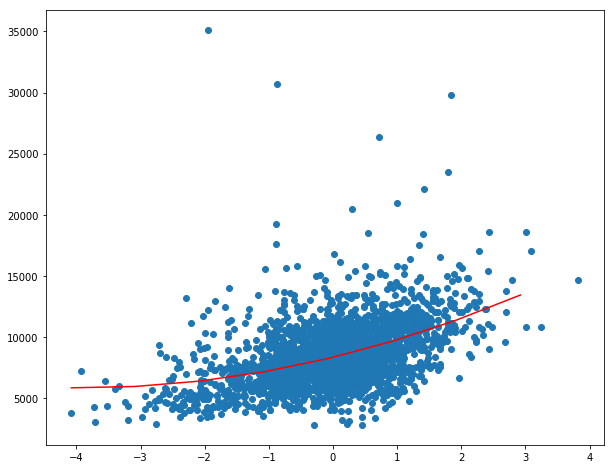

In [274]:
plt.figure(figsize=(10,8))
plt.scatter(X_train_s[chosen_variable].values,y_train)
plt.plot(X_fit,y_pred,color="red")
print("R^2 score = {:.2f}".format(r2_score(y_train,lin_reg_2.predict(X_poly_b))))

## Cubic

In [275]:
poly_reg = PolynomialFeatures(degree=3)
X_poly_b = poly_reg.fit_transform(X_train_s[chosen_variable].values.reshape(-1,1))
lin_reg_3 = LinearRegression()

In [276]:
lin_reg_3.fit(X_poly_b,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [277]:
X_fit = np.arange(X_train_s[chosen_variable].values.min(),X_train_s[chosen_variable].values.max(),1)[:,np.newaxis]

In [278]:
y_pred = lin_reg_3.predict(poly_reg.fit_transform(X_fit.reshape(-1,1)))

R^2 score = 0.21


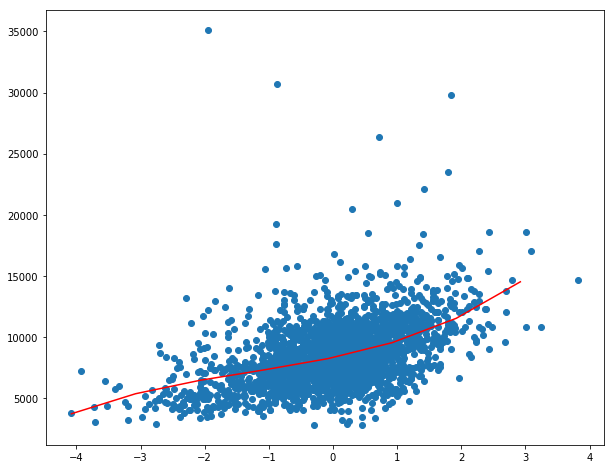

In [279]:
plt.figure(figsize=(10,8))
plt.scatter(X_train_s[chosen_variable].values,y_train)
plt.plot(X_fit,y_pred,color="red")
print("R^2 score = {:.2f}".format(r2_score(y_train,lin_reg_3.predict(X_poly_b))))

## Degree of 7

In [280]:
poly_reg = PolynomialFeatures(degree=7)
X_poly_b = poly_reg.fit_transform(X_train_s[chosen_variable].values.reshape(-1,1))
lin_reg_7 = LinearRegression()

In [281]:
lin_reg_7.fit(X_poly_b,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [282]:
X_fit = np.arange(X_train_s[chosen_variable].values.min(),X_train_s[chosen_variable].values.max(),1)[:,np.newaxis]

In [283]:
y_pred = lin_reg_7.predict(poly_reg.fit_transform(X_fit.reshape(-1,1)))

R^2 score = 0.22


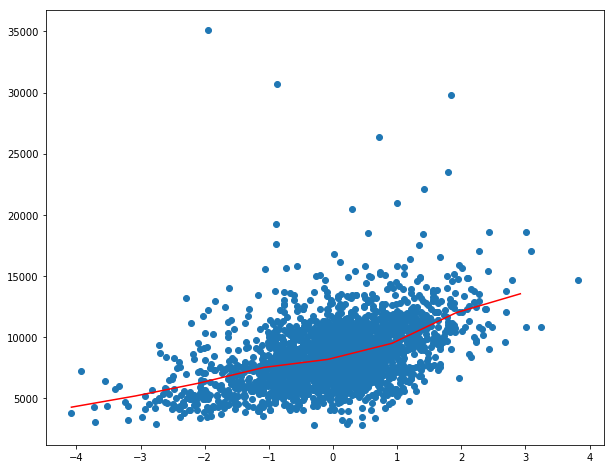

In [284]:
plt.figure(figsize=(10,8))
plt.scatter(X_train_s[chosen_variable].values,y_train)
plt.plot(X_fit,y_pred,color="red")
print("R^2 score = {:.2f}".format(r2_score(y_train,lin_reg_7.predict(X_poly_b))))

## Degree of 10

In [285]:
poly_reg = PolynomialFeatures(degree=10)
X_poly_b = poly_reg.fit_transform(X_train_s[chosen_variable].values.reshape(-1,1))
lin_reg_10 = LinearRegression()

In [286]:
lin_reg_10.fit(X_poly_b,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [287]:
X_fit = np.arange(X_train_s[chosen_variable].values.min(),X_train_s[chosen_variable].values.max(),1)[:,np.newaxis]

In [288]:
y_pred = lin_reg_10.predict(poly_reg.fit_transform(X_fit.reshape(-1,1)))

R^2 score = 0.22


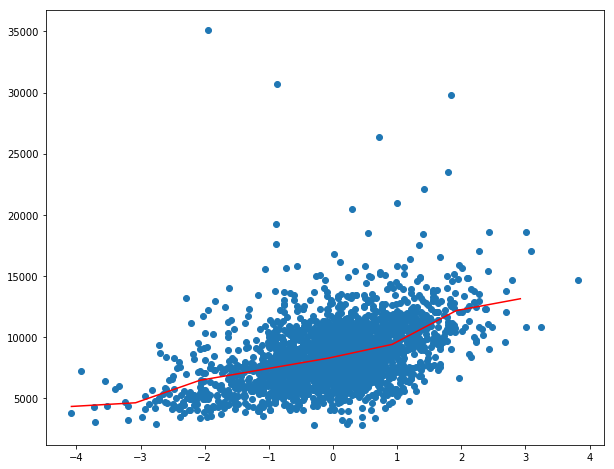

In [289]:
plt.figure(figsize=(10,8))
plt.scatter(X_train_s[chosen_variable].values,y_train)
plt.plot(X_fit,y_pred,color="red")
print("R^2 score = {:.2f}".format(r2_score(y_train,lin_reg_10.predict(X_poly_b))))